In [1]:
import sys
sys.path.append('/home/johann/sonstiges/comma10k-segmenation-pytorch')

import os 
import torch
from dataset import Comma10kDataset, train_test_split, get_test_transforms
import matplotlib.pyplot as plt 

In [36]:
comma10k_dir = "/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k"
imgs_root = os.path.join(comma10k_dir, "imgs")
masks_root = os.path.join(comma10k_dir, "masks")
classes = [41, 76, 90, 124, 161]

In [7]:
train_imgs, test_imgs = train_test_split(imgs_root)

In [8]:
len(test_imgs)

989

In [12]:
test_dataset = Comma10kDataset(imgs_root, masks_root, test_imgs, classes, get_test_transforms())

In [21]:
for img, mask in test_dataset:
    print(img.size())
    print(mask.size())
    break

torch.Size([3, 448, 576])
torch.Size([5, 448, 576])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


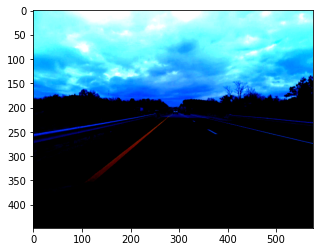

In [22]:
img = torch.transpose(img, 0, 2)
img = torch.transpose(img, 0, 1).numpy()
plt.imshow(img)

In [23]:
mask = mask.numpy()

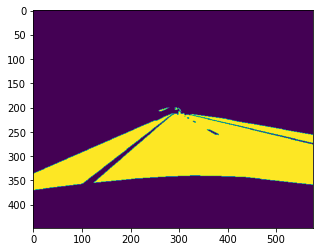

In [24]:
plt.imshow(mask[0])

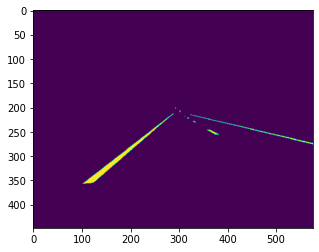

In [25]:
plt.imshow(mask[1])

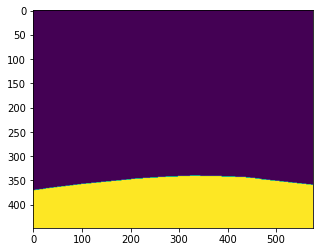

In [26]:
plt.imshow(mask[2])

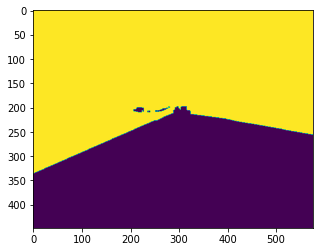

In [27]:
plt.imshow(mask[3])

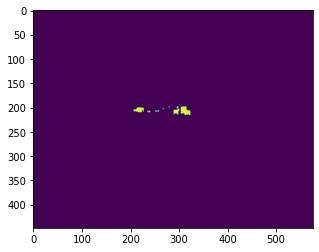

In [28]:
plt.imshow(mask[4])

# Test Model

In [2]:
import os 
import cv2
import random 
import glob 
import torch 
import torch.nn.functional as F
import numpy as np
from model import RegSeg
import matplotlib.pyplot as plt 

from PIL import ImageColor

import albumentations as A 
from albumentations.pytorch import ToTensorV2
from config import get_cfg_defaults 


In [3]:
imgs_folder = "/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/imgs"
masks_folder = "/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/masks"
checkpoint = "/home/johann/sonstiges/comma10k-segmenation-pytorch/exps/2022-04-02/weights/best.pth"
classes = [41, 76, 90, 124, 161]

In [4]:
cfg = get_cfg_defaults()
cfg.merge_from_file("/home/johann/sonstiges/comma10k-segmenation-pytorch/exps/2022-04-02/config.yaml")

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
model = RegSeg(num_classes=len(classes))
if cfg.SYSTEM.NUM_GPUS > 1:
    model = torch.nn.DataParallel(model)
model.load_state_dict(torch.load(checkpoint))
model.to(device)

DataParallel(
  (module): RegSeg(
    (encoder): Encoder(
      (conv): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (d_block_1_4): DBlock(
        (conv1): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2))
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2))
        (bn3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu3): ReLU(inplace=True)
        (conv4): Conv2d(32, 48, kernel_size=(1, 1), stride=(1, 1))
        (bn4): BatchNorm2d(48, 

In [7]:
model.eval()

DataParallel(
  (module): RegSeg(
    (encoder): Encoder(
      (conv): Sequential(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (d_block_1_4): DBlock(
        (conv1): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2))
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2))
        (bn3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu3): ReLU(inplace=True)
        (conv4): Conv2d(32, 48, kernel_size=(1, 1), stride=(1, 1))
        (bn4): BatchNorm2d(48, 

In [8]:
transform = A.Compose([
    A.Resize(height=14*32, width=18*32), #height, width
    A.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225],
    ),
    ToTensorV2(),
])

In [9]:
test_imgs = glob.glob(imgs_folder + "/*.png")
samples = random.sample(test_imgs, 5)
for sample in samples:
    print(sample)

/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/imgs/4146_b67de2c85620cf60_2018-09-18--15-10-11_3_779.png
/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/imgs/0361_b0c9d2329ad1606b_2018-10-20--11-59-26_10_240.png
/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/imgs/h133_453aca88a89910f0_2019-02-06--13-16-06_8_27.png
/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/imgs/5075_2ac95059f70d76eb_2018-09-03--11-17-52_10_329.png
/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/imgs/8825_9fdbdf5f7c30ddf7_2018-07-05--13-20-39_5_615.png


In [145]:
def predict(model, img_path, transforms, device):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transformed_img = transforms(image=img)["image"]
    transformed_img = transformed_img.unsqueeze(0).to(device)
    
    with torch.no_grad():
        pred = model(transformed_img)
    
    pred = torch.sigmoid(pred)
    pred = pred.detach().cpu().squeeze().numpy()
    
    return pred

In [146]:
pred_0 = predict(model, samples[0], transform, device)

In [151]:
pred_m = (pred_0 > .5)
pred_m.shape

(5, 448, 576)

In [152]:
npred = np.multiply(pred_0, pred_m)
npred.shape

(5, 448, 576)

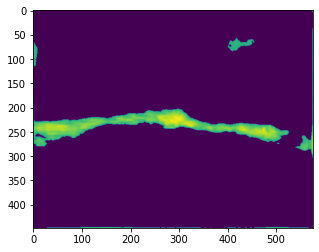

In [157]:
plt.imshow(npred[4])

In [86]:
channel2color = {
    0: "#402020",
    1: "#ff0000",
    2: "#cc00ff",
    3: "#808060",
    4: "#00ff66",
}

In [87]:
channel2class = {
    0: "road",
    1: "lane markings",
    2: "my car",
    3: "undrivable",
    4: "movable",
}

In [88]:
class_names = [
    "road",
    "lane markings",
    "undrivable",
    "movable",
    "my car"
]

In [89]:
hex_colors = [
    "#402020",
    "#ff0000",
    "#808060",
    "#00ff66",
    "#cc00ff",
]

In [90]:
rgb_colors = [list(ImageColor.getcolor(color, "RGB")) 
                   for color in list(channel2color.values())]
rgb_colors               

[[64, 32, 32], [255, 0, 0], [204, 0, 255], [128, 128, 96], [0, 255, 102]]

In [91]:
rgb_colors = np.array(rgb_colors).astype("uint8")

In [158]:
def plot_segmentation(
    model, 
    img_path, 
    classes,
    colors,
    transforms, 
    device, 
    figsize=(16,9),
    img_weight=0.5,
):
    pred = predict(model, img_path, transforms, device)
    classMap = np.argmax(pred, axis=0)
    print(classMap.shape)
    colored_mask = colors[classMap]
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    colored_mask = cv2.resize(
        colored_mask, 
        (image.shape[1], image.shape[0]), 
        interpolation=cv2.INTER_NEAREST,
    )
    
    output = ((img_weight * image) + ((1. - img_weight) * colored_mask)).astype("uint8")
    
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(output)

(448, 576)


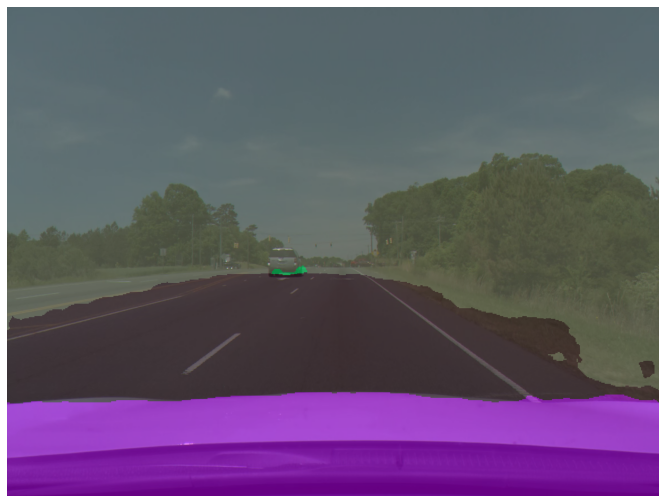

In [159]:
plot_segmentation(
    model, 
    samples[1], 
    classes, 
    rgb_colors, 
    transform, 
    device,
)

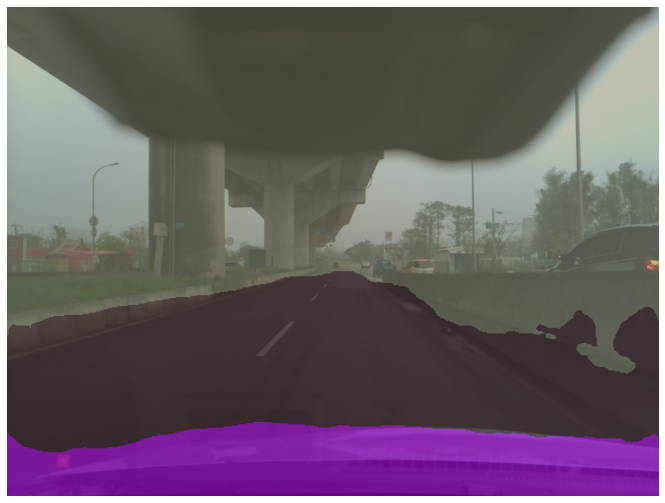

In [94]:
plot_segmentation(
    model, 
    samples[2], 
    classes, 
    rgb_colors, 
    transform, 
    device,
)

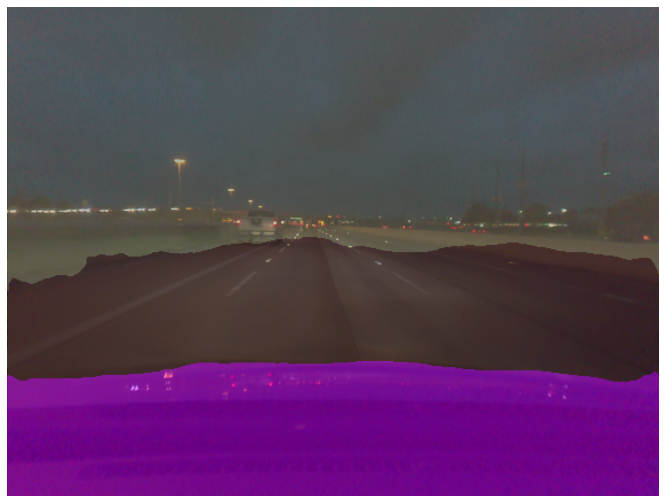

In [95]:
plot_segmentation(
    model, 
    samples[3], 
    classes, 
    rgb_colors, 
    transform, 
    device,
)

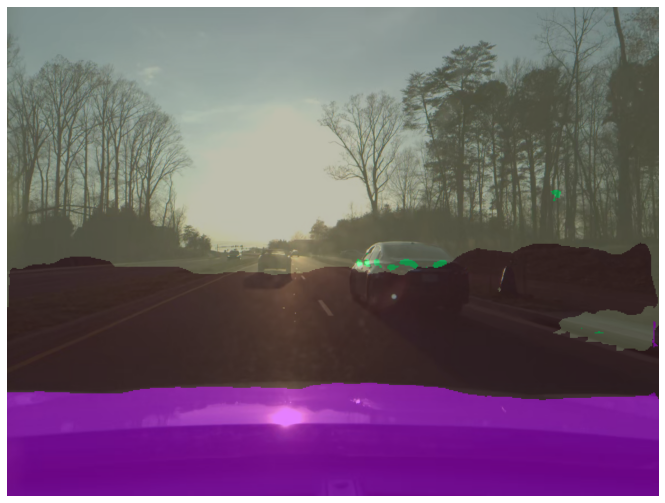

In [96]:
plot_segmentation(
    model, 
    samples[4], 
    classes, 
    rgb_colors, 
    transform, 
    device,
)

In [97]:
def plot_pred2tgt(
    model, 
    img_path, 
    classes,
    colors,
    transforms, 
    device,
    masks_folder,
    outname="/home/johann/sonstiges/comma10k-segmenation-pytorch/assets/example.jpg",
    figsize=(12,5),
    img_weight=0.5,
):
    _, filename = os.path.split(img_path)
    mask_path = os.path.join(masks_folder, filename)
    
    pred = predict(model, img_path, transforms, device)
    classMap = np.argmax(pred, axis=0)
    
    colored_mask = colors[classMap]
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    tgt_mask = cv2.imread(mask_path)
    tgt_mask = cv2.cvtColor(tgt_mask, cv2.COLOR_BGR2RGB)
    
    colored_mask = cv2.resize(
        colored_mask, 
        (image.shape[1], image.shape[0]), 
        interpolation=cv2.INTER_NEAREST,
    )
    
    output = ((img_weight * image) + ((1. - img_weight) * colored_mask)).astype("uint8")
    
    fig, axs = plt.subplots(1, 2, figsize=figsize)
   
    axs[0].imshow(output)
    axs[0].set_title('Prediction')
    axs[0].axis('off')
    axs[1].imshow(tgt_mask)
    axs[1].set_title('Groundtruth')
    axs[1].axis('off')
    fig.tight_layout()
    plt.show()
    fig.savefig(outname)

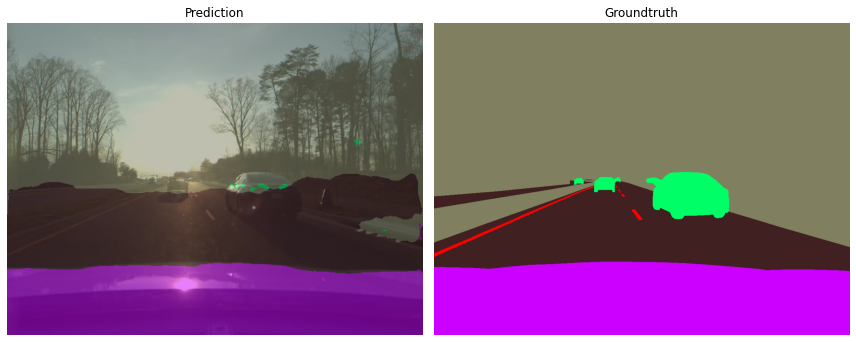

In [98]:
plot_pred2tgt(
    model, 
    samples[4], 
    classes, 
    rgb_colors, 
    transform, 
    device,
    masks_folder,
    "/home/johann/sonstiges/comma10k-segmenation-pytorch/assets/example-0.jpg",
)

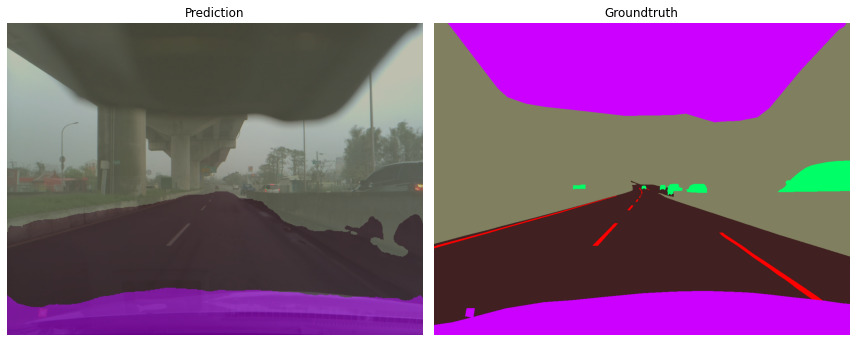

In [99]:
plot_pred2tgt(
    model, 
    samples[2], 
    classes, 
    rgb_colors, 
    transform, 
    device,
    masks_folder,
    "/home/johann/sonstiges/comma10k-segmenation-pytorch/assets/example-1.jpg"
)

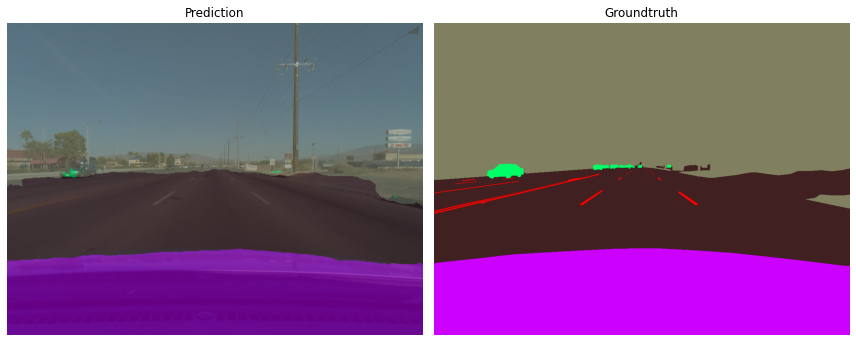

In [100]:
plot_pred2tgt(
    model, 
    samples[0], 
    classes, 
    rgb_colors, 
    transform, 
    device,
    masks_folder,
    "/home/johann/sonstiges/comma10k-segmenation-pytorch/assets/example-2.jpg"
)

# Evaluation

In [101]:
imgs_folder = "/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/imgs"
masks_folder = "/home/johann/sonstiges/comma10k-segmenation-pytorch/comma10k/masks"
checkpoint = "/home/johann/sonstiges/comma10k-segmenation-pytorch/exps/2022-04-02/weights/best.pth"
classes = [41, 76, 90, 124, 161]

In [102]:
test_imgs = glob.glob(imgs_folder + "/*.png")
samples = random.sample(test_imgs, 5)
for sample in samples:
    print(os.path.split(sample)[1])

3867_f550e313a9262051_2018-07-21--12-48-55_106_25.png
7517_2665ce6f7b1dce08_2018-05-07--12-25-48_19_915.png
6488_559a1f5393595bff_2019-04-28--16-59-33_146_191.png
3419_6a8d7ed93e936b4d_2018-08-22--18-20-13_3_203.png
7466_13a662ec4f42e353_2019-06-17--09-38-22_301_381.png


In [103]:
import segmentation_models_pytorch as smp

In [104]:
img_path = samples[0]
_, filename = os.path.split(img_path)
mask_path = os.path.join(masks_folder, filename)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transformed_img = transform(image=img)["image"]
transformed_img = transformed_img.unsqueeze(0).to(device)

with torch.no_grad():
    pred = model(transformed_img)

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

tgt_mask = cv2.imread(mask_path, 0).astype("uint8")
tgt_mask = cv2.resize(tgt_mask, (pred.size()[3], pred.size()[2]))

tgt_mask = torch.tensor(tgt_mask).long()
mask = torch.stack([(tgt_mask == v) for v in classes], axis=0).unsqueeze(0)

In [105]:
pred.size()

torch.Size([1, 5, 448, 576])

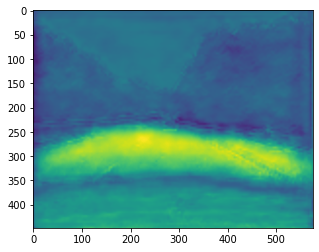

In [106]:
plt.imshow(pred.squeeze().cpu().numpy()[1])

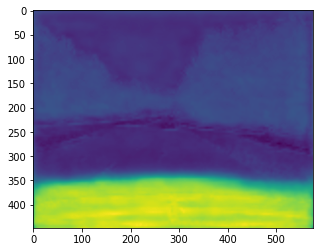

In [107]:
plt.imshow(pred.squeeze().cpu().numpy()[2])

In [108]:
mask.size()

torch.Size([1, 5, 448, 576])

In [109]:
pred = pred.cpu()

In [110]:
tp, fp, fn, tn = smp.metrics.get_stats(
    pred, mask, mode='multilabel', threshold=0.5)

In [111]:
iou_score = smp.metrics.iou_score(tp, fp, fn, tn, reduction="micro")
iou_score

tensor(0.8367)

In [112]:
f1_score = smp.metrics.f1_score(tp, fp, fn, tn, reduction="micro")
f1_score

tensor(0.9111)

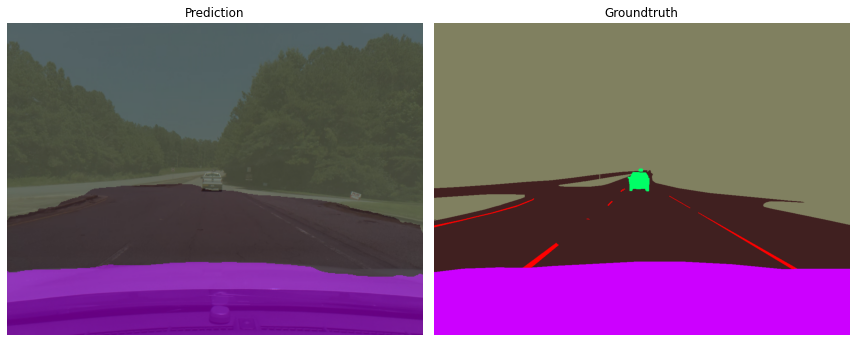

In [113]:
plot_pred2tgt(
    model, 
    samples[0], 
    classes, 
    rgb_colors, 
    transform, 
    device,
    masks_folder,
    "/home/johann/sonstiges/comma10k-segmenation-pytorch/assets/example-2.jpg"
)

In [114]:
accuracy = smp.metrics.accuracy(tp, fp, fn, tn, reduction="macro")
accuracy

tensor(0.9616)

In [115]:
recall = smp.metrics.recall(tp, fp, fn, tn, reduction="micro-imagewise")
recall

tensor(0.9888)